# Принятие решений в бизнесе на основе данных

# Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt
import seaborn as sns

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
hypothesis = pd.read_csv('hypothesis.csv', index_col=0)
pd.set_option('display.max_colwidth', -1)
hypothesis

C:\Users\chern\AppData\Local\Temp\ipykernel_7988\3505620096.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

## Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
# Добавим столбец ICE для приоритизации гипотез
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']) 
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


## Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
# Добавим столбец RICE для приоритизации гипотез
hypothesis['RICE'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'])
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [7]:
cm = sns.light_palette("blue", as_cmap=True)

s = hypothesis.style.background_gradient(cmap=cm)
s

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.000000,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.000000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.000000,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.000000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.000000,16.000000


## Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

При расчете с помощью фреймворка ICE гипотезой с самым большим показателем является номер 9 "Запустить акцию, дающую скидку на товар в день рождения" и гипотеза номер 1 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" - так как у них наблюдаются самые большие параметры Impact и Confidence. То есть при оценке этих гипотез выдвинуто предположение, что эти изменения сильно повлияют на охваченных пользователей (на 9/10 у 9 гипотезы и на 10/10 у 1 гипотезы), а также, что есть уверенность в оценках других параметров на основе, возможно, опыта конкурентов или предыдущего опыта (9/10 у гипотезы 9 и 8/10 у гипотезы 1). Также высокие показатели получились, так как параметр Effort является средним среди всех гипотез, то есть проверка гипотезы скорее всего потребует разработки, которая займет какое-то время и надо будет подключать разработчиков к оценке объема работы. 
При оценке же гипотез с помощью фреймворка RICE выяснилось, что гипотезой с самым большим показателем стала гипотеза 8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (в то время как при оценке ICE она была на 3 месте). Объяснить это можно влиянием показателя Reach, которая по формуле находится в числителе и которая означает охват пользователей. Данный показатель равен 10 и означает, что всем пользователям добавят форму подписки на основные страницы, чтобы собрать базу клиентов. В то время как у "лидеров" по фреймворку ICE имеют минимальные показатели Reach (1 и 3 соотвественно). Не все пользователи будут охвачены в процессе проверки гипотезы. 

# Часть 2. Анализ A/B-теста

In [8]:
orders = pd.read_csv('orders1.csv', index_col=0)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.duplicated().sum()

0

In [11]:
visitors = pd.read_csv('visitors.csv', index_col=0)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.duplicated().sum()

0

In [13]:
orders.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,503
B,586


In [14]:
groupA = orders.query('group == "A"').reset_index()
groupB = orders.query('group == "B"').reset_index()


In [15]:
s1 = pd.merge(groupA, groupB, how='inner', on=['visitorId'])
print(s1['visitorId'].unique().shape[0])

58


In [16]:
print('Количество пользователей, который состоят в двух группах тестирования: ', s1['visitorId'].unique().shape[0])

Количество пользователей, который состоят в двух группах тестирования:  58


В данном тестировании выяснилось, что у нас существуют пользователи, которые присутствуют в обеих группах. Мы не можем точно сказать почему они образовались, но можно предположить, что эти пользователи тестовые. То есть при заведении теста человек перебрасывал пользователей из одной группы в другую.
Также стоит отметить, что группы распределены в некоторой степени неравномерно, что может повлиять на результаты тестирования, так как группы должны быть равны.

In [17]:
# Найдем общую выручку по дням для обеих групп тестирования
revenue_group = (
    orders.drop(['transactionId', 'visitorId'], axis=1)
    .groupby(['group', 'date'], as_index=False)
    .agg({'revenue': 'sum'})
)

revenue_group

,group,date,revenue
0,A,2019-08-01,148579
1,A,2019-08-02,93822
2,A,2019-08-03,112473
3,A,2019-08-04,70825
4,A,2019-08-05,124218
...,...,...,...
57,B,2019-08-27,147677
58,B,2019-08-28,96008
59,B,2019-08-29,231130
60,B,2019-08-30,215233


In [18]:
revenue_A = revenue_group.query('group == "A"')
revenue_B = revenue_group.query('group == "B"')

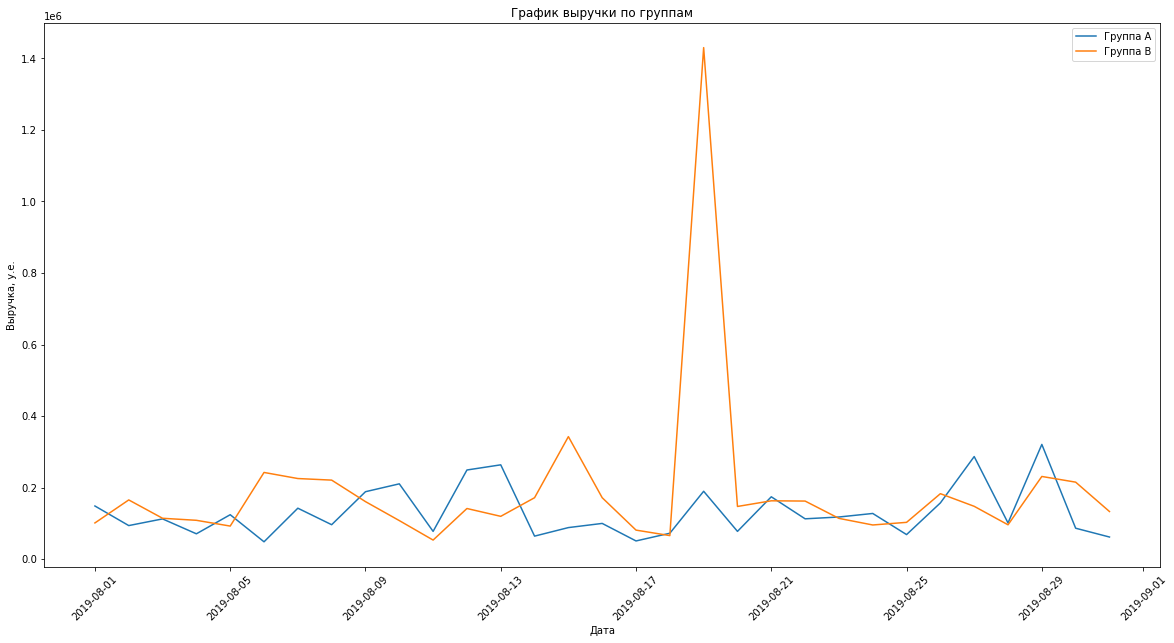

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(revenue_A['date'], revenue_A['revenue'], label='Группа A')
plt.plot(revenue_B['date'], revenue_B['revenue'], label='Группа B')
plt.title('График выручки по группам')
plt.ylabel('Выручка, у.е.')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Согласно построенному графику выручки по группам по дням мы не можем сделать точный вывод  какой сегмент лучше. Результаты по дням сильно колеблются. Также есть сильные выбросы на 19-08-2021. Тест стоит продолжать. 

## Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [20]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']).sort_values(by=['date', 'group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


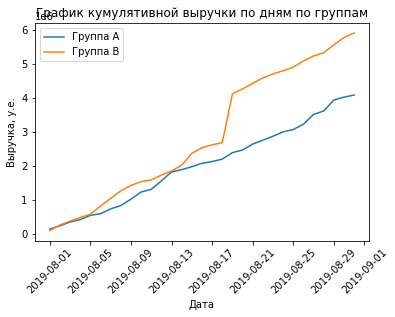

<Figure size 2160x1080 with 0 Axes>

In [21]:
# Постройте графики кумулятивной выручки по дням по группам.
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.legend()
plt.title("График кумулятивной выручки по дням по группам")
plt.ylabel('Выручка, у.е.')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.figure(figsize=(30, 15))
# plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
#             arrowprops=dict(facecolor='g'))
# plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
#             arrowprops=dict(facecolor='g'))
plt.show()

В первой половине тестирования сегмент В вышел вперед и лидировал до конца теста с резким увелечением в середине теста. Аномальные выбросы сильно влияют на график и показатели, необходимо очистить данные в заключительном анализе.

## Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

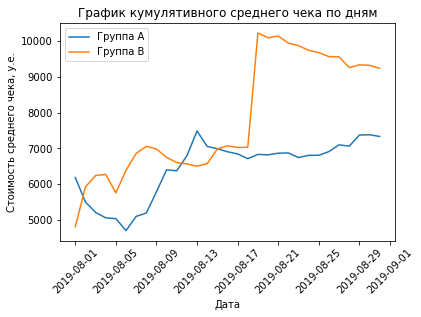

<Figure size 1440x720 with 0 Axes>

In [22]:
# Для каждой группы постройте графики кумулятивного среднего чека по дням.
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B')
plt.legend()
plt.title("График кумулятивного среднего чека по дням")
plt.ylabel('Стоимость среднего чека, у.е.')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

На графике кумулятивного среднего чека наблюдается колебание в первой половине графика, однако затем идет резкий взлет сегмента В. Принимать решение по этой метрике рано, стоит удалить выбросы, которые сильно искажают график. 

## Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

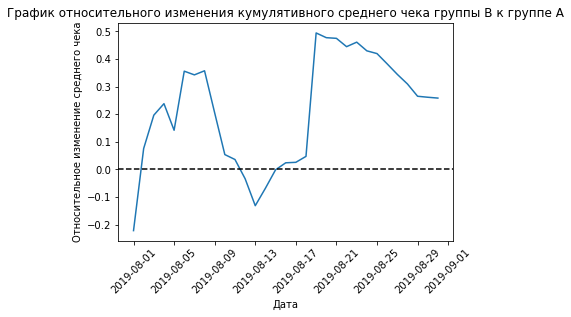

<Figure size 1440x720 with 0 Axes>

In [23]:
# Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.ylabel('Относительное изменение среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

На графике присутствую колебания в первой половине, так как сегменты А и В попеременно выходят в лидеры, однако потом происходит резкий взлет из-за выбросов сегмента В и график выходит на пик. 

## Постройте график кумулятивной конверсии по группам. 

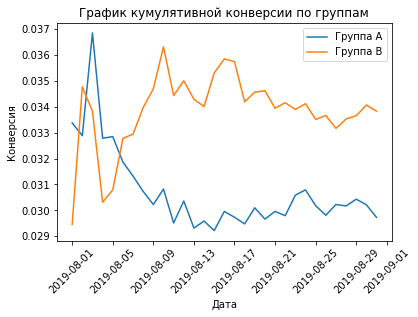

<Figure size 1440x720 with 0 Axes>

In [24]:
# Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.legend()
plt.title("График кумулятивной конверсии по группам")
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

В сегменте А в начале тестирования наблюдается пиковое значение кумулятивной конверсии, после чего происходит резкое падение. В то время как сегмент В в начале тестирования выходит в лидеры и до конца теста остается им.

## Постройте график относительного изменения кумулятивной конверсии группы B к группе A.

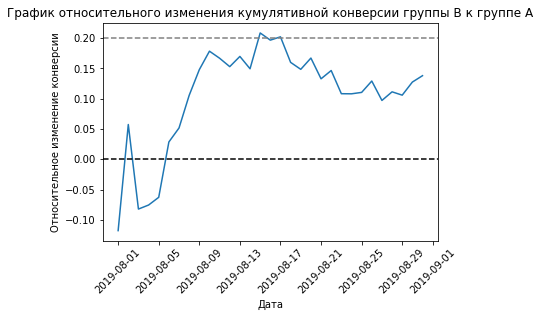

<Figure size 1440x720 with 0 Axes>

In [25]:
# Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.ylabel('Относительное изменение конверсии')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

После того, как сегмент группы В вышел в лидеры по конверсии он становится лучше и лучше и достигает прироста в 20% относительно группы А. 

## Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

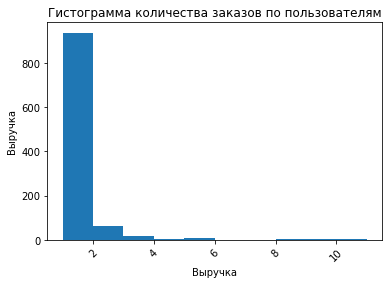

<Figure size 1440x720 with 0 Axes>

In [26]:
# Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']
plt.hist(ordersByUsers['orders'])
plt.title("Гистограмма количества заказов по пользователям")
plt.ylabel('Выручка')
plt.xlabel('Выручка')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

Большинство пользователей совершили 1 заказ. Однако непонятно сколько пользователей заказало 2, 3 и более заказов. Построим точечный график.

## Постройте точечный график количества заказов по пользователям.

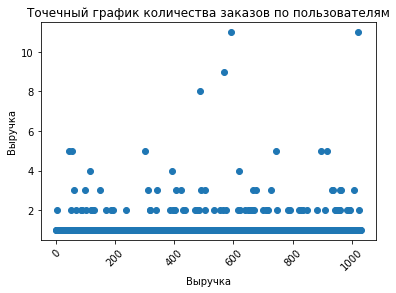

<Figure size 1440x720 with 0 Axes>

In [27]:
# Постройте точечный график количества заказов по пользователям.
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям")
plt.ylabel('Выручка')
plt.xlabel('Выручка')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

На графике наблюдается, что пользователей, заказавших более 2 раз крайне мало. Посчитаем перцентили, чтобы определить большое это количтсво или нет.

## Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.

In [28]:
# Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 1% пользователей делают более 3 заказов. И около 5% делают больше 2 заказов.

## Постройте точечный график стоимостей заказов.

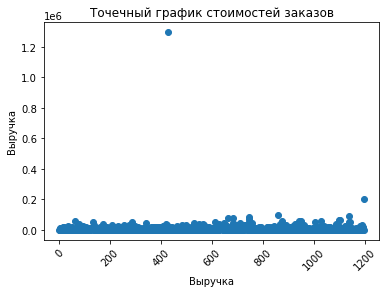

<Figure size 1440x720 with 0 Axes>

In [29]:
# Постройте точечный график стоимостей заказов.
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("Точечный график стоимостей заказов")
plt.ylabel('Выручка')
plt.xlabel('Выручка')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 10))
plt.show()

На графике наблюдается, что в среднем все заказы находятся в промежутке до 200000 у.е., но есть и выбросы в 1200000 у.е.

## Посчитайте 95-й и 99-й перцентили стоимости заказов. 

In [30]:
# Посчитайте 95-й и 99-й перцентили стоимости заказов. 
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% пользователей делают заказ на сумму в 28000 у.е. И около 1% делают заказы на сумму дороже 58233 у.е.
Принимаем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 50 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [31]:
# Посчитаем ежедневное количество пользователей для группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# Посчитаем ежедневное количество пользователей для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# Посчитаем ежедневное количество заказов и выручки для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# Посчитаем ежедневное количество заказов и выручки для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# Сгруппируем в общую таблицу таблицы по ежедневным заказам по группам, выручке по группам, и количеству пользователей
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


## Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. 

1. Нулевая гипотеза: конверсии между группами по "сырым" данным равны
2. Обратная гипотеза: конверсии между группами по "сырым" данным различаются

In [32]:
# Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(
         0, 
         index=np.arange(
             data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
         ), 
         name='orders'
     )
    ], 
    axis=0
)
sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(
         0, 
         index=np.arange(
             data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
         ), 
         name='orders'
     )
    ], 
    axis=0
)
 
print("Значение p-Value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный прирост конверсии группы B к группе A составляет: {0:.2%}".format(((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)))

Значение p-Value: 0.01679
Относительный прирост конверсии группы B к группе A составляет: 13.81%


P-value значительно меньше 0,05, потому нулевую гипотезу отвергаем. Анализ "сырых" данных сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А составляет 13,81%.

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

1. Нулевая гипотеза: показатели среднего чека между группами по "сырым" данным равны
2. Обратная гипотеза: показатели среднего чека между группами по "сырым" данным различаются

In [33]:
# Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
print('Значение p-Value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Относительное различие среднего чека группы B к среднему чеку группы A составляет: {0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-Value: 0.729
Относительное различие среднего чека группы B к среднему чеку группы A составляет: 25.87%


P-value значительно больше 0,05 - нулевую гипотезу должны принять. Статистически значимых отличий между средними чекамми между группами нет. При этом относительные различия между чеками равны 25,87% 

## Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.

1. Нулевая гипотеза: конверсии между группами по "очищенным" данным равны
2. Обратная гипотеза: конверсии между группами по "очищенным" данным различаются

In [34]:
# Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
18      199603092
23      237748145
1137    759473111
949     887908475
Name: visitorId, dtype: int64

Принимаем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 50 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

## Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [35]:
# Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('Значение p-Value по "очищенным данным": {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительный прирост по "очищенным данным" конверсии группы B к группе A составляет: {0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-Value по "очищенным данным": 0.01144
Относительный прирост по "очищенным данным" конверсии группы B к группе A составляет: 15.83%


Как и в случае с сырыми данными, статистически значимых отличий между конверсиями между группами нет. Относительный прирост по "очищенным данным" конверсии группы B к группе A составляет: 15.83%

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [36]:
# Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
print(
    'Значение p-Value по "очищенным данным": {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        alternative = 'two-sided')[1]
    )
)

print(
    "Относительный прирост в среднем чеке заказа между группами по «очищенным» данным: {0:.2%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение p-Value по "очищенным данным": 0.819
Относительный прирост в среднем чеке заказа между группами по «очищенным» данным: 2.36%


P-value значительно больше 0,05 - нулевую гипотезу должны принять. Статистически значимых отличий между средними чекамми между группами нет. При этом относительные различия между чеками равны 2,36%.

## Примите решение по результатам теста и объясните его. 

Кумулятивные метрики практически стабилизируются и показывают улучшения по одной метрике и равенство по другой. По этой причине стоит остановить тест, зафиксировать победу группы В над группой А.

# Общий вывод

По результатам этапа приоритезации гипотез получилось, что при оценке гипотез с помощью фреймворка RICE гипотезой с самым большим показателем стала гипотеза 8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". При окрашивании таблицы с максимальными показателями по столбцам наглядно видно, что строка с этой гипотезой добивалась наивысших показателей. 
По результатам второй части анализа можно отметить, что в данных присутствую аномально большие выбросы, их необходимо было очистить для проведения дальнейшего тестирования гипотезы. Выяснили, что такими аномальными данными  будут являться заказы больше 50000 у.е. и с количеством заказов больше 3. 
По результатам А/Б-теста по очищенным данным получилось, что статистически значимых отличий между конверсиями между группами нет. Относительный прирост по "очищенным данным" конверсии группы B к группе A составляет: 15.83%. При этом статистически значимых отличий между показателями по средним чекам между группами нет. При этом относительные различия между чеками равны 2,36%.
По окончании анализа сделан вывод, что стоит остановить тест, зафиксировать победу группы В над группой А.